Le but de ce projet est de proposer un sysème de recommandation de Pokemons.

Création du dossier images

In [ ]:
!mkdir images

Imports

In [153]:
!pip3 install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/3a/e7/3bac01547d2ed3d308ac92a0878fbdb0ed0f3d41fb1906c319ccbba1bfbc/kaggle-1.5.12.tar.gz
  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/9d/fb/886e8ec7862989afc0c35d15813b6c665fe134cc6027cdde2fa300abe9a2/graphviz-0.19.1-py3-none-any.whl
    100% |████████████████████████████████| 153kB 6.2MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 5.0MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 17.7MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 15.5MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 8.4MB/s eta 0:00:01
    100% |████████████████████████████████| 20.0MB 86kB/s s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/80/c1/23fd82ad3121656b585351aba6c19761926bb0db2ebed9e4ff09a43a3fcc/pyparsing-3.0.7-py3

## How to use Kaggle API

### 1st step

Créer un compte sur kaggle.com

### 2nd step

Aller dans Your Profile > Account 
Créer une nouvelle clef d'API

### 3rd step

Déplacer le fichier kaggle.json dans `/fs03/share/users/<current_user>/home/.kaggle`

In [6]:
import kaggle
from PIL import Image
import os, numpy, sys
import matplotlib.pyplot as plot
import math
import json
import random
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz
import pydotplus

In [3]:
PATH_TO_IMAGES = "./images/pokemon/pokemon"
EXTENSIONS = [".jpeg", ".png", ".jpg"]
POKEMON_TYPES = ["Acier", "Combat", "Dragon", "Eau", "Electrik", "Fee", "Feu", "Glace", "Insecte", "Normal", "Plante", "Poison", "Psy", "Roche", "Sol", "Spectre", "Tenebres", "Vol"]
LOCATION = ["Kant", "Johto", "Hoenn", "Sinnoh", "Unys", "Kalos", "Alola", "Galar"]
NB_USERS = 20

In [ ]:
# Récupération du dataset
kaggle.api.authenticate()

kaggle.api.dataset_download_files('kvpratama/pokemon-images-dataset', path='./images', unzip=True)

In [4]:
numpy.set_printoptions(threshold=sys.maxsize)

def get_dominant_colors(imgfile):
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    print(numarray.size)
    # Filtrage du "fond" des png
    numarray = numarray[numarray[:,3] > 0]
    clusters = KMeans(n_clusters = 4)
    clusters.fit(numarray)
    npbins = numpy.arange(0, 5)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    # Tri des couleus par fréquence
    sorted_histogram = numpy.sort(histogram[0].astype(numpy.int))[::-1]

    dominant_colors = []
    for i in range(4):
        dominant_colors.append('#%02x%02x%02x' % (
        math.ceil(clusters.cluster_centers_[i][0]), 
            math.ceil(clusters.cluster_centers_[i][1]),
        math.ceil(clusters.cluster_centers_[i][2])))
    return dominant_colors

In [7]:
# Génération des exifs du dataset. Les types de pokemon ainsi que leur région sont choisis au hasard
metadataJSON = {}
i = 0
for filename in os.listdir(PATH_TO_IMAGES):
    for extension in EXTENSIONS:
        if filename.endswith(extension):
            print(filename)
            imgfile = Image.open(PATH_TO_IMAGES + "/" + filename)
            imgfile.convert("RGBA")
            colors = get_dominant_colors(imgfile)
            if imgfile.width == imgfile.height:
                orientation = "square"
            elif imgfile.width > imgfile.height:
                orientation = "landscape"
            else:
                orientation = "portrait"
            metadataJSON[filename] = {
                "size" : imgfile.size,
                "format" : extension,
                "orientation" : orientation,
                # "liked" : random.uniform(0, 1) < 0.4,
                "color_0" : colors[0],
                "color_1" : colors[1],
                "color_2" : colors[2],
                "color_3" : colors[3],
                "type_1" : random.choice(POKEMON_TYPES),
                "type_2" : random.choice(POKEMON_TYPES) if random.uniform(0, 1) < 0.5 else None,
                "location" : random.choice(LOCATION)
            }
            break
    if i < 105:
        i += 1
    else:
        break
            
with open("metadata.json", "w") as jsonFile:
    jsonFile.write(json.dumps(metadataJSON, indent=4))

269.png
262144
681.png
262144
152.png
262144
688.png
262144
714.png
262144
338.png
262144
313.png
262144
80.png
262144
56.png
262144
448.png
262144


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


698.png
262144
412-trash.png
262144
9.png
262144
71.png
262144
589.png
262144
295.png
262144
374.png
262144
559.png
262144
40.png
262144
262.png
262144
413-plant.png
262144
328.png
262144
343.png
262144
462.png
262144
282-mega.png
262144
208.png
262144
662.png
262144
92.png
262144
257.png
262144
641-therian.png
262144
466.png
262144
706.png
262144
155.png
262144
311.png
262144
235.png
262144
670.png
262144
316.png
262144
465.png
262144
77.png
262144
598.png
262144
388.png
262144
686.png
262144
112.png
262144
386-defense.png
262144
369.png
262144
167.png
262144
226.png
262144
376-mega.png
262144
142-mega.png
262144
463.png
262144
14.png
262144
504.png
262144
198.png
262144
236.png
262144
324.png
262144
546.png
262144
447.png
262144
563.png
262144
451.png
262144
543.png
262144
329.png
262144
545.png
262144
513.png
262144
247.png
262144
648.png
262144
297.png
262144
206.png
262144
284.png
262144
201-f.png
262144
379.png
262144
505.png
262144
184.png
262144
276.png
262144
683.png
262144
68

### Comment prévoyez-vous de traiter ces tags ? Est-il possible d'automatiser ce processus ?

On peut automatiser ce processus en demandant à des internautes de tagger les images via un site web (site web dédié au tag d'images ou via des captcha).

## Analyse de données

Demandez à l'utilisateur de sélectionner quelques images et d'ajouter des balises. Pour chaque utilisateur, vous êtes
maintenant prêt à construire un profil de préférences d'utilisateur, basé sur cette sélection.
Vous pouvez recueillir les informations suivantes manuellement, mais l'objectif de
cette tâche consiste à les obtenir en utilisant les images sélectionnées de manière automatisée : 

1.  Couleurs préférées
2.  Orientation de l'image préférée
3.  Tailles d'images préférées (vignettes, grandes images, images de taille moyenne
    images, etc.)
4.  Balises favorites
5.  \...

Maintenant, grâce à votre connaissance des différents types de classificateurs et
les algorithmes de regroupement, quelles informations supplémentaires ajouterez-vous pour chaque
image ?

Votre prochain objectif est d'analyser les informations des utilisateurs et leur
les images préférées. Comment avez-vous créé des utilisateurs aléatoires ? Combien d'utilisateurs avez-vous
créer ? Quelles informations avez-vous stockées pour chaque utilisateur ? Quels types d'analyses avez-vous effectuées ?

In [8]:
# Création des profil utilisateurs
file = open("metadata.json")
data = json.load(file)
# Création des utilisateurs
users = []

# Pour chaque utilisateurs on va stocker sa couleur préférée et si il a aimé l'image ou non
for i in range(NB_USERS):
    user = {
        'id' : i,
        'images' : []
    }
    for key in data.keys():
        colors = [data[key]['color_0'], data[key]['color_1'], data[key]['color_2'], data[key]['color_3']]
        sample = {
            'id_image' : key,
            'favorite_color' : colors[0],
            'like' : random.uniform(0, 1) < 0.4
        }
        user['images'].append(sample)
    users.append(user)
    

#### Visualisation des données

Dans cette tâche, votre objectif est de visualiser les différentes caractéristiques de
toutes les images téléchargées.

1.  Le nombre d'images disponibles pour chaque année (ici pour chaque __type de pokemons et chaque localisation__)
2.  Le nombre d'images disponibles pour les différents types : taille de l'image,
    l'orientation des images, les modèles d'appareils photo, etc. 
3.  Caractéristiques des couleurs


           size format orientation  color_0  color_1  color_2  color_3  \
0    [256, 256]   .png      square  #a0ad59  #0e0d0a  #6a822e  #d7b1ae   
1    [256, 256]   .png      square  #cdc09d  #3e3936  #f2f1ec  #998981   
2    [256, 256]   .png      square  #d4e3b1  #708f64  #0c0c09  #9bbc84   
3    [256, 256]   .png      square  #e3e4cb  #6e686a  #d18d61  #13100e   
4    [256, 256]   .png      square  #bfaac5  #81608a  #070605  #2f272c   
..          ...    ...         ...      ...      ...      ...      ...   
101  [256, 256]   .png      square  #a8a89a  #4b433d  #e8eee0  #e09a52   
102  [256, 256]   .png      square  #e08684  #1a1c18  #f2e8ad  #b35e5e   
103  [256, 256]   .png      square  #388bc8  #e5bf5a  #635c5f  #0f0e0e   
104  [256, 256]   .png      square  #b3a09b  #1b1615  #e1ddda  #dddddf   
105  [256, 256]   .png      square  #a2d45e  #0f160c  #79a542  #cae7ca   

       type_1    type_2 location  
0       Glace     Glace     Unys  
1      Combat  Electrik    Johto  
2    T

<AxesSubplot:title={'center':'Pokemon per type 2'}, xlabel='type_2'>

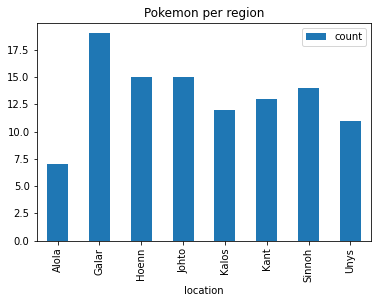

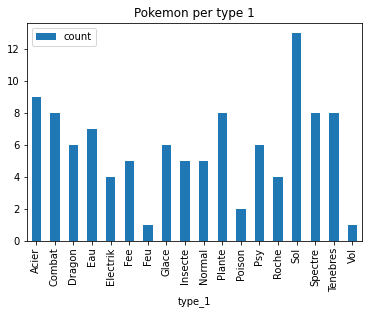

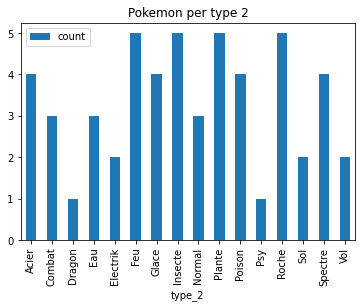

In [9]:
# Convertir en dataframe
dataframe = pd.DataFrame(data.values())

print(dataframe)

# Group by location
dataframe_location = dataframe[['location', 'size']]
grouped_by_location = dataframe_location.groupby('location').count()
grouped_by_location = grouped_by_location.rename(columns={'size':'count'}).reset_index()
grouped_by_location.plot(x=0, kind='bar', title="Pokemon per region")

# Grouped by type 1
dataframe_type_1 = dataframe[['type_1', 'size']]
grouped_by_types = dataframe_type_1.groupby('type_1').count()
grouped_by_types = grouped_by_types.rename(columns={'size':'count'}).reset_index()
grouped_by_types.plot(x=0, kind='bar', title="Pokemon per type 1")

# Grouped by type 2
dataframe_type_2 = dataframe[['type_2', 'size']]
grouped_by_types = dataframe_type_2.groupby('type_2').count()
grouped_by_types = grouped_by_types.rename(columns={'size':'count'}).reset_index()
grouped_by_types.plot(x=0, kind='bar', title="Pokemon per type 2")


Les utilisateurs peuvent également visualiser les informations ci-dessus relatives à leurs images préférées. Dans cette tâche, vous devez également ajouter une fonctionnalité permettant aux utilisateurs de visualiser les informations liées à leur propre profil d'utilisateur.

In [10]:
id_user = -1
while id_user < 0 or id_user > NB_USERS - 1:
    id_user = int(input("Entrez un ID utilisateur (max : " + str(NB_USERS - 1) + ") :"))
    
user_data = users[id_user]
user_df = pd.DataFrame(user_data["images"])
user_df


Entrez un ID utilisateur (max : 19) :4


,id_image,favorite_color,like
0,269.png,#a0ad59,False
1,681.png,#cdc09d,False
2,152.png,#d4e3b1,True
3,688.png,#e3e4cb,False
4,714.png,#bfaac5,False
...,...,...,...
101,676-diamond.png,#a8a89a,False
102,240.png,#e08684,True
103,588.png,#388bc8,False
104,572.png,#b3a09b,False


#### Système de recommandation

Êtes-vous maintenant prêt à recommander des images à un utilisateur ? Dans cette tâche, votre objectif est de construire le système de recommandation. Quelle approche avez-vous décidé de prendre ? Filtrage collaboratif, basé sur le contenu ou une approche hybride ? Pour chaque utilisateur, êtes-vous maintenant en mesure de construire une profil ? Quel type d'information avez-vous utilisé pour établir un profil d'utilisateur profil ? Qu'est-ce qui manque ? Quelles sont les limites de votre proposition ?

/fs03/share/users/baptiste.lazareth/home/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/fs03/share/users/baptiste.lazareth/home/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


['False']
[0.49792106 0.3125546  0.18952434]


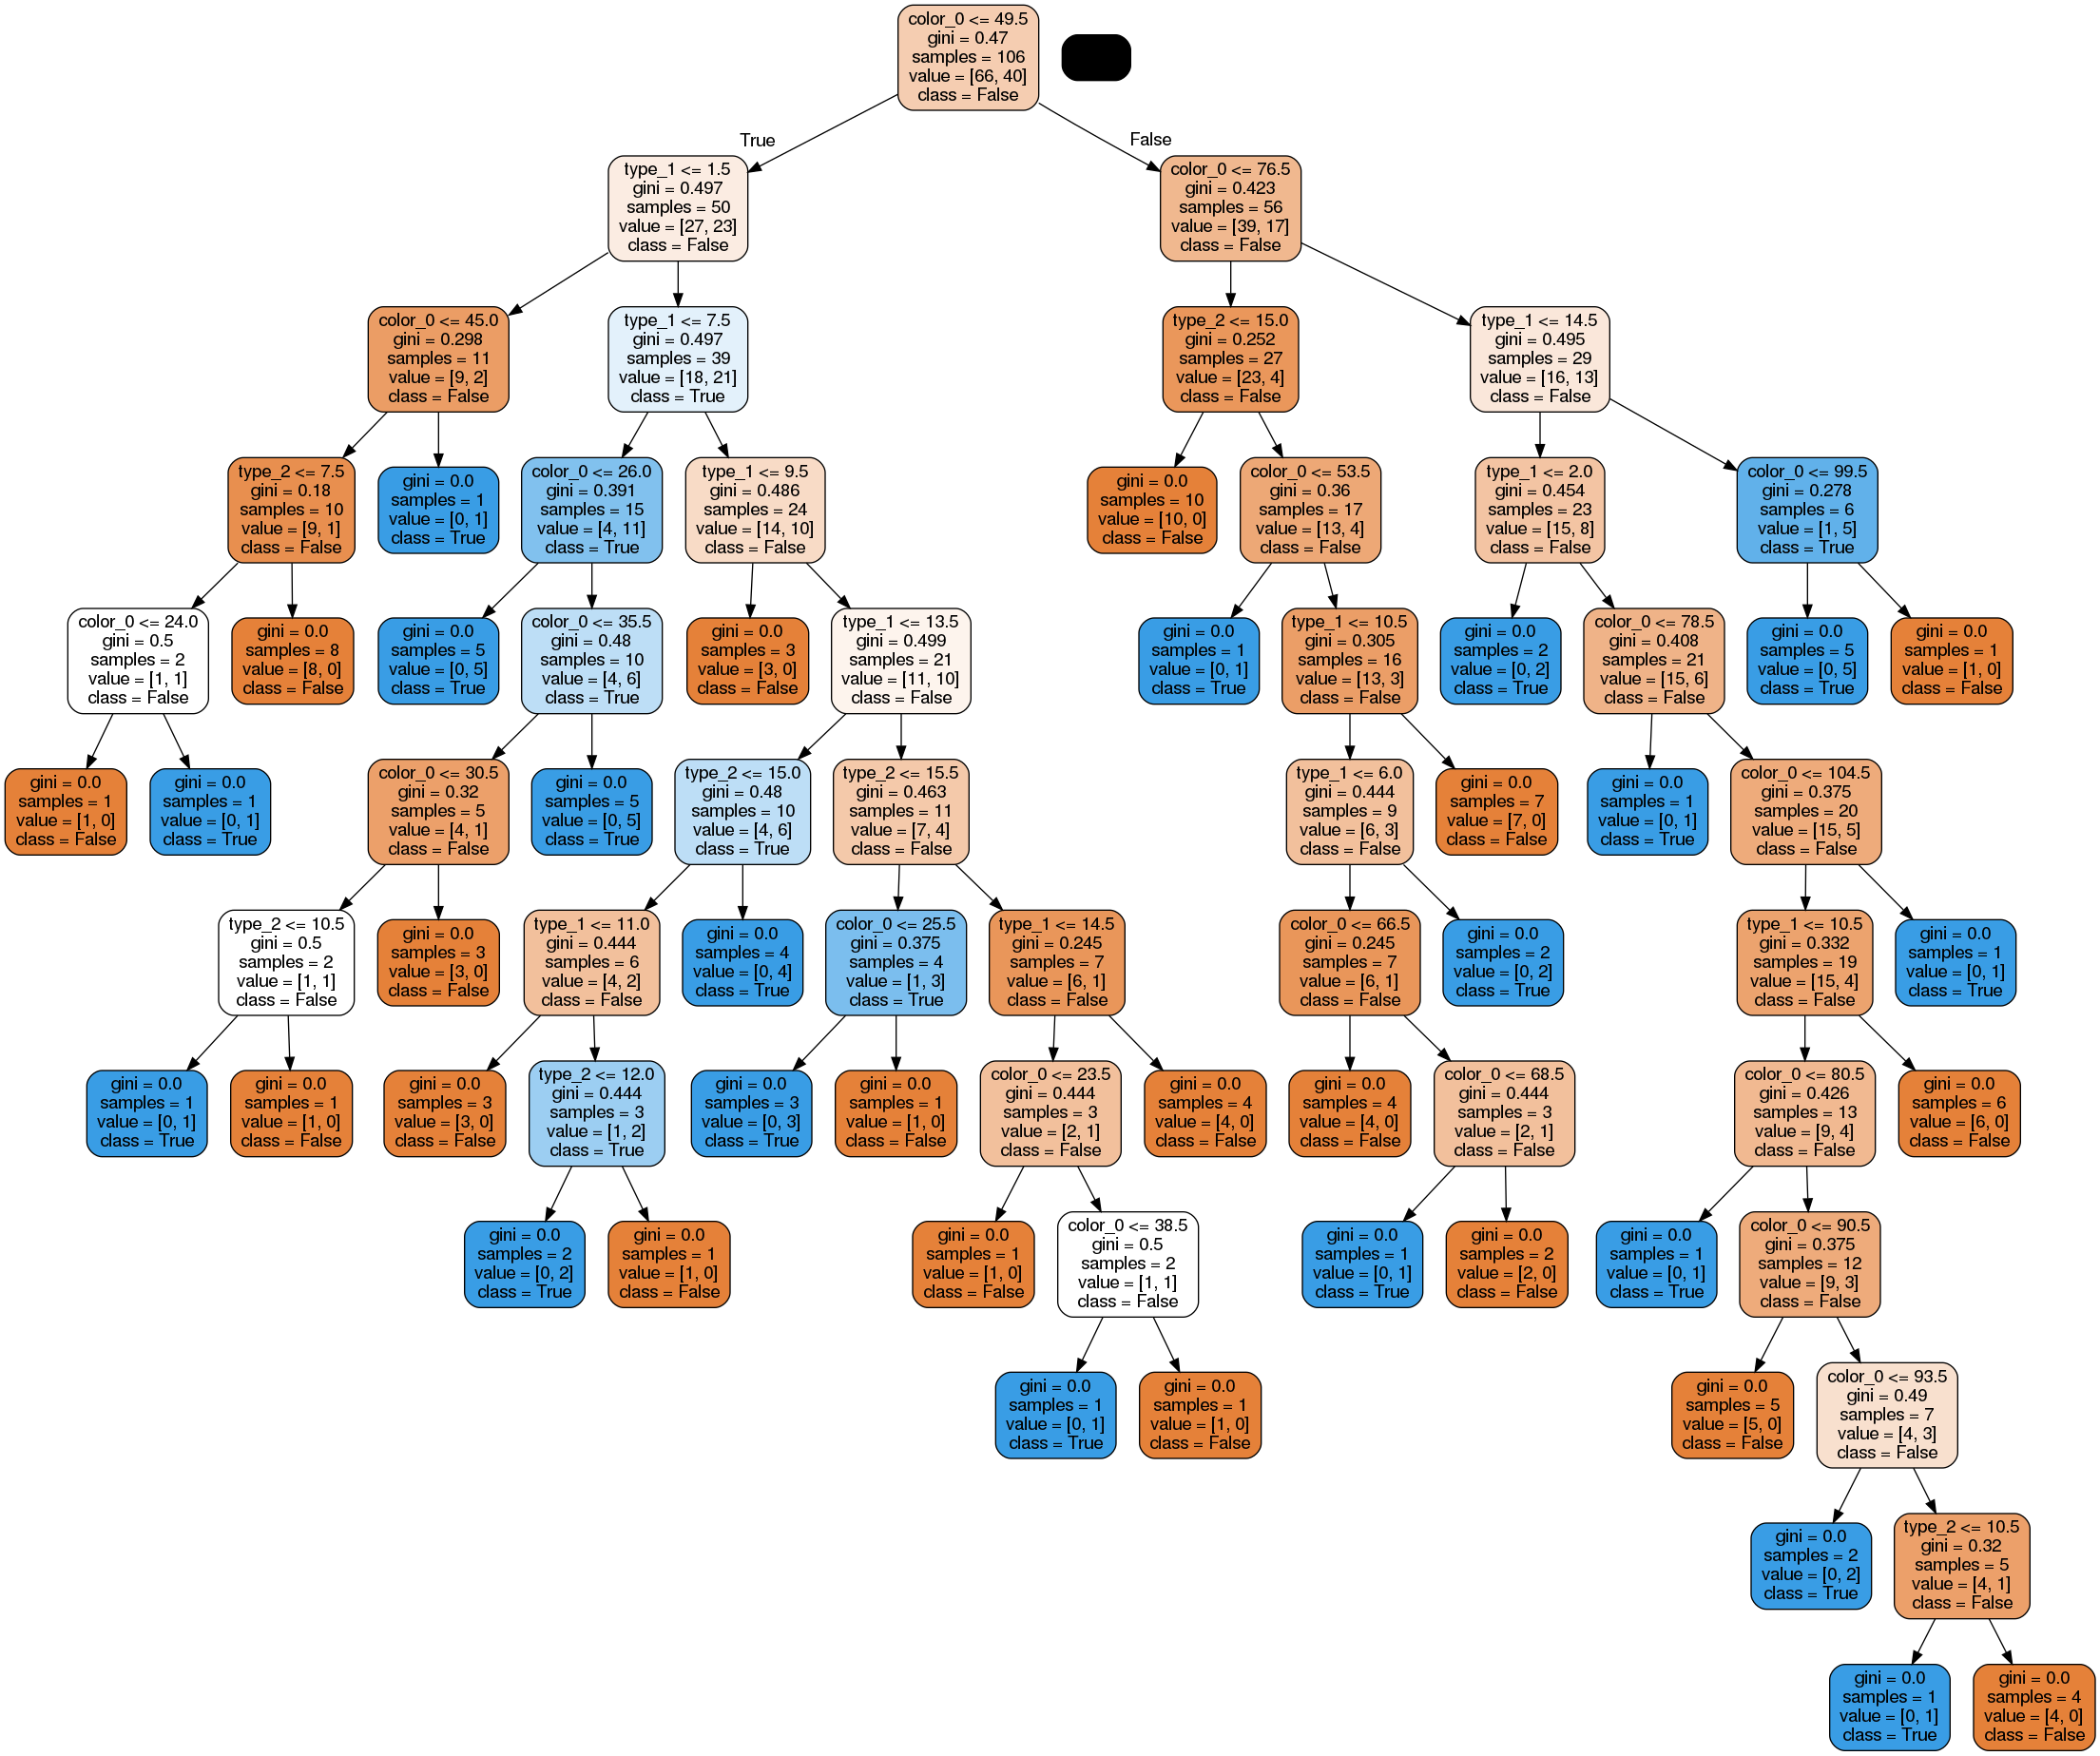

In [25]:
import IPython

resultFrame = user_df[["like"]]
resultFrame["like"] = resultFrame["like"].astype(str)
df = dataframe[["color_0", "type_1", "type_2"]]


def generate_label(dataframe, column_name):
    le = LabelEncoder()
    dataframe[column_name] = le.fit_transform(dataframe[column_name])
    return le

# generating label
le1 = generate_label(df, "color_0")
le2 = generate_label(df, "type_1")
le3 = generate_label(df, "type_2")

le4 = generate_label(resultFrame, "like")

# Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(df, resultFrame)

# Prediction
prediction = dtc .predict([
    [le1.transform(["#a0ad59"])[0], le2.transform(["Psy"])[0], 
     le3.transform(["Vol"])[0]]
])
print(le4.inverse_transform(prediction))
print(dtc.feature_importances_)

dot_data = tree.export_graphviz(dtc, out_file=None,
          feature_names=df.columns,
          filled=True, rounded=True, 
          class_names =
          le4.inverse_transform(
            resultFrame.like.unique())
         ) 
graph = graphviz.Source(dot_data) 

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
img = IPython.display.Image(pydot_graph.create_png())
IPython.display.display(img)


